In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
bank_data = pd.read_csv("/kaggle/input/bank-credit-scoring/bank.csv", sep=";")

In [3]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank_data['y'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: xlabel='y', ylabel='count'>

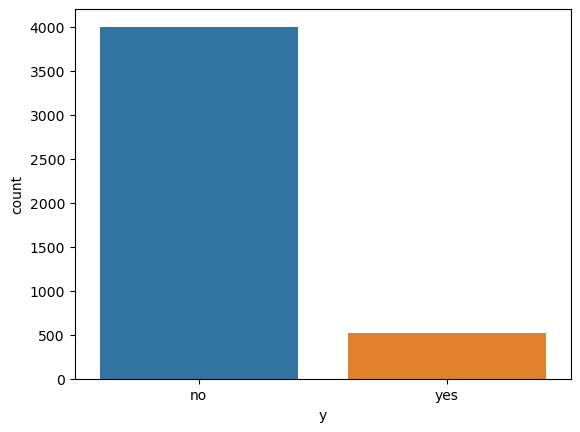

In [6]:
sns.countplot(x='y',data=bank_data)

<Axes: xlabel='poutcome', ylabel='count'>

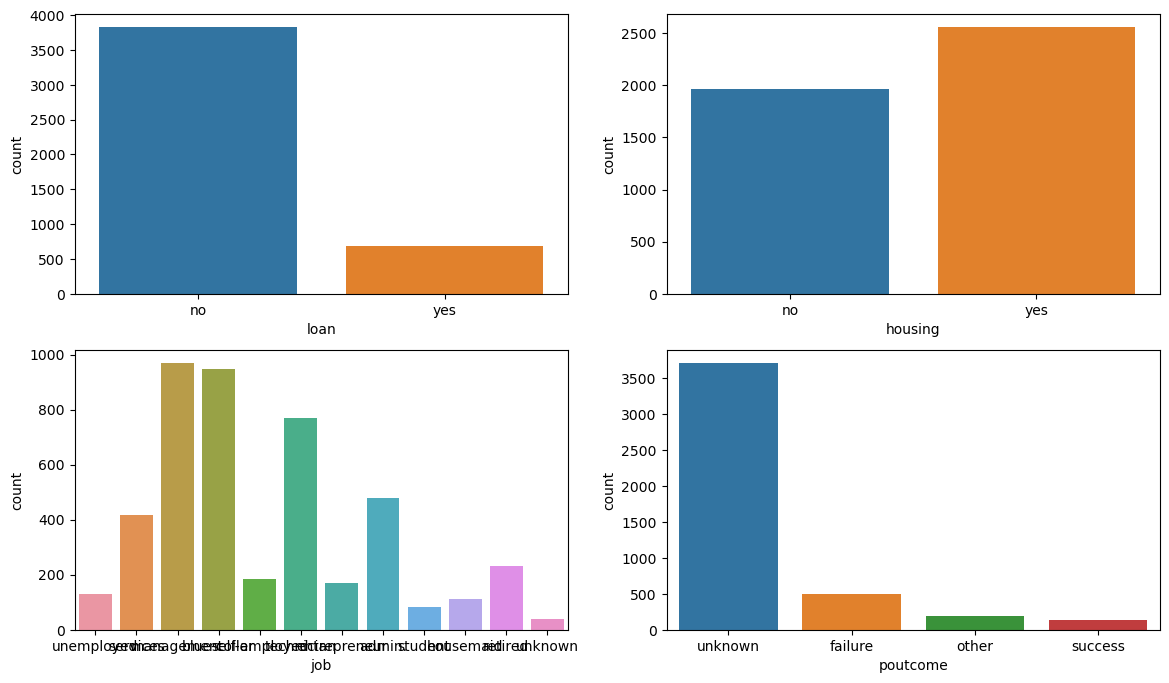

In [7]:
fig, ax= plt.subplots(nrows= 2, ncols = 2, figsize= (14,8))
sns.countplot(x='loan',data=bank_data, ax=ax[0][0])
sns.countplot(x='housing',data=bank_data, ax=ax[0][1])
sns.countplot(x='job',data=bank_data, ax=ax[1][0])
sns.countplot(x='poutcome',data=bank_data, ax=ax[1][1])

In [8]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
lc = LabelEncoder()
for i in bank_data.columns:
    if bank_data[i].dtype == object:
        bank_data[i] = lc.fit_transform(bank_data[i])

In [10]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [11]:
bank_x = bank_data.iloc[:,:-1]
bank_y = bank_data['y']

In [12]:
bank_x.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3


In [13]:
bank_y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [14]:
print(bank_x.shape, bank_y.shape)

(4521, 16) (4521,)


In [15]:
train_x,test_x, train_y, test_y = train_test_split(bank_x, bank_y, test_size=0.3)

In [16]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(3164, 16) (3164,) (1357, 16) (1357,)


**LOGISTIC REGRESSION!!!**

In [17]:
model_lr = LogisticRegression()
model_lr.fit(train_x, train_y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print("Train accuracy:",accuracy_score(model_lr.predict(train_x), train_y))
print("Test accuracy:",accuracy_score(model_lr.predict(test_x), test_y))

Train accuracy: 0.8865360303413401
Test accuracy: 0.89240972733972


In [19]:
polynomial_class = PolynomialFeatures(degree=2)
poly_train_x = polynomial_class.fit_transform(train_x)
poly_test_x = polynomial_class.fit_transform(test_x)

In [20]:
model_lr.fit(poly_train_x, train_y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
print("Train accuracy:",accuracy_score(model_lr.predict(poly_train_x), train_y))
print("Test accuracy:",accuracy_score(model_lr.predict(poly_test_x), test_y))

Train accuracy: 0.868204804045512
Test accuracy: 0.8636698599852616


**DECISION TREE!!!**

In [22]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(train_x, train_y)

DecisionTreeClassifier()

In [23]:
print("Train accuracy:",accuracy_score(model_dtc.predict(train_x), train_y))
print("Test accuracy:",accuracy_score(model_dtc.predict(test_x), test_y))

Train accuracy: 1.0
Test accuracy: 0.8570375829034635


**KNN CLASSIFIER!!!**

In [24]:
model_knn= KNeighborsClassifier(n_neighbors=2)
model_knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=2)

In [25]:
print("Train accuracy:",accuracy_score(model_knn.predict(train_x), train_y))
print("Test accuracy:",accuracy_score(model_knn.predict(test_x), test_y))

Train accuracy: 0.9143489254108723
Test accuracy: 0.8776713338246132


In [26]:
for i in range(1,6):
    model_knn= KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(train_x, train_y)
    print("Train accuracy with neighbors",i ,":",accuracy_score(model_knn.predict(train_x), train_y))
    print("Test accuracy with neighbors",i ,":",accuracy_score(model_knn.predict(test_x), test_y))
    print("***************************************************")

Train accuracy with neighbors 1 : 1.0
Test accuracy with neighbors 1 : 0.8548268238761975
***************************************************
Train accuracy with neighbors 2 : 0.9143489254108723
Test accuracy with neighbors 2 : 0.8776713338246132
***************************************************
Train accuracy with neighbors 3 : 0.9140328697850821
Test accuracy with neighbors 3 : 0.8695652173913043
***************************************************
Train accuracy with neighbors 4 : 0.9026548672566371
Test accuracy with neighbors 4 : 0.8806190125276345
***************************************************
Train accuracy with neighbors 5 : 0.9032869785082175
Test accuracy with neighbors 5 : 0.8703021370670597
***************************************************


**NAIVE BAYES!!!**

In [27]:
model_nb = GaussianNB()
model_nb.fit(train_x, train_y)

GaussianNB()

In [28]:
print("Train accuracy:",accuracy_score(model_nb.predict(train_x), train_y))
print("Test accuracy:",accuracy_score(model_nb.predict(test_x), test_y))

Train accuracy: 0.8359671302149179
Test accuracy: 0.8290346352247605


**RANDOM FOREST CLASSIFICATION!!!**

In [29]:
model_rf = RandomForestClassifier(n_estimators=2)
model_rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=2)

In [30]:
print("Train accuracy:",accuracy_score(model_rf.predict(train_x), train_y))
print("Test accuracy:",accuracy_score(model_rf.predict(test_x), test_y))

Train accuracy: 0.9560682680151706
Test accuracy: 0.8938835666912307


In [31]:
for i in range(1,6):
    model_rf= RandomForestClassifier(n_estimators=i)
    model_rf.fit(train_x, train_y)
    print("Train accuracy with neighbors",i ,":",accuracy_score(model_rf.predict(train_x), train_y))
    print("Test accuracy with neighbors",i ,":",accuracy_score(model_rf.predict(test_x), test_y))
    print("***************************************************")

Train accuracy with neighbors 1 : 0.9475347661188369
Test accuracy with neighbors 1 : 0.8636698599852616
***************************************************
Train accuracy with neighbors 2 : 0.9462705436156763
Test accuracy with neighbors 2 : 0.887988209285188
***************************************************
Train accuracy with neighbors 3 : 0.9747155499367889
Test accuracy with neighbors 3 : 0.8835666912306559
***************************************************
Train accuracy with neighbors 4 : 0.9683944374209861
Test accuracy with neighbors 4 : 0.8887251289609432
***************************************************
Train accuracy with neighbors 5 : 0.9835651074589128
Test accuracy with neighbors 5 : 0.8887251289609432
***************************************************
